In [40]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/keri/git/DotLovesData/data/mergedNoNan.csv')
df.head()

,AU2017_code,Date_x,AU_GMP_PER_CAPITA,Dep_Index,AU2017_name,TA2018_name,TALB,Date_y,crime,n,Pop
0,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District,2018-02-01,Abduction,0,401
1,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District,2018-03-01,Abduction,0,402
2,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District,2018-04-01,Abduction,0,408
3,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District,2018-05-01,Abduction,0,409
4,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District,2018-06-01,Abduction,0,410


In [29]:
time = pd.read_csv('/Users/keri/git/DotLovesData/data/mergedNoNan.csv',usecols=['Date_x'])

In [30]:
time.head()

,Date_x
0,2013-03-01
1,2013-03-01
2,2013-03-01
3,2013-03-01
4,2013-03-01


In [3]:
len(df['AU2017_code'].unique())

489

In [4]:
len(df['AU2017_name'].unique())

489

In [8]:
#delete AU2017_name as it is redundant with AU2017_code
#delete TA2018_name as it is embedded in the TALB feature
df.drop(columns=['AU2017_name'],inplace=True)
df.drop(columns=['TA2018_name'],inplace=True)

In [13]:
df.dtypes

AU2017_code            int64
Date_x                object
AU_GMP_PER_CAPITA    float64
Dep_Index            float64
TALB                  object
Date_y                object
crime                 object
n                      int64
Pop                    int64
dtype: object

In [31]:
#convert to datetime and change column name so is more informative
#df['Date_GMP'] = pd.to_datetime(time['Date_x']) #was deleted somewhere down the line so replacing it
df['Date_Crime'] = pd.to_datetime(df['Date_y'])
df['Date_GMP'] = pd.to_datetime(df['Date_x'])

In [20]:
#drop old date columns
df.drop(columns=['Date_x','Date_y'],inplace=True)

In [24]:
df["crime"] = df["crime"].astype('category')
df["crime_cat"] = df["crime"].cat.codes
df["TALB"] = df["TALB"].astype('category')
df["talb_cat"] = df["TALB"].cat.codes

In [32]:
df.head()

,AU2017_code,AU_GMP_PER_CAPITA,Dep_Index,TALB,crime,n,Pop,Date_Crime,crime_cat,talb_cat,Date_GMP
0,500100,62.732541,9.0,Far North District,Abduction,0,401,2018-02-01,0,21,2013-03-01
1,500100,62.732541,9.0,Far North District,Abduction,0,402,2018-03-01,0,21,2013-03-01
2,500100,62.732541,9.0,Far North District,Abduction,0,408,2018-04-01,0,21,2013-03-01
3,500100,62.732541,9.0,Far North District,Abduction,0,409,2018-05-01,0,21,2013-03-01
4,500100,62.732541,9.0,Far North District,Abduction,0,410,2018-06-01,0,21,2013-03-01


In [33]:
df.dtypes

AU2017_code                   int64
AU_GMP_PER_CAPITA           float64
Dep_Index                   float64
TALB                       category
crime                      category
n                             int64
Pop                           int64
Date_Crime           datetime64[ns]
crime_cat                      int8
talb_cat                       int8
Date_GMP             datetime64[ns]
dtype: object

In [34]:
cleaned = df.drop(columns=['crime','TALB'])

In [41]:
df['GMP_standardized'] = StandardScaler().fit_transform(np.array(df['AU_GMP_PER_CAPITA']).reshape(-1,1))

In [42]:
df.head()

,AU2017_code,AU_GMP_PER_CAPITA,Dep_Index,TALB,crime,n,Pop,Date_Crime,crime_cat,talb_cat,Date_GMP,GMP_standardized
0,500100,62.732541,9.0,Far North District,Abduction,0,401,2018-02-01,0,21,2013-03-01,0.18873
1,500100,62.732541,9.0,Far North District,Abduction,0,402,2018-03-01,0,21,2013-03-01,0.18873
2,500100,62.732541,9.0,Far North District,Abduction,0,408,2018-04-01,0,21,2013-03-01,0.18873
3,500100,62.732541,9.0,Far North District,Abduction,0,409,2018-05-01,0,21,2013-03-01,0.18873
4,500100,62.732541,9.0,Far North District,Abduction,0,410,2018-06-01,0,21,2013-03-01,0.18873


/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


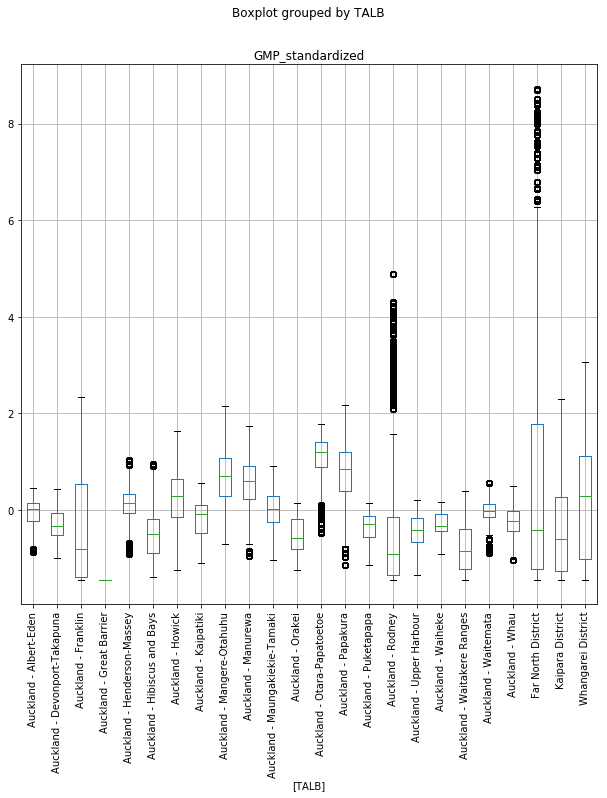

In [52]:
fig,ax = plt.subplots(figsize=(10,10))
df.boxplot(column='GMP_standardized',by=['TALB'],rot=90,ax=ax)
plt.savefig('/Users/keri/git/DotLovesData/visuals/boxplotStandardizedGMPByTALB')
#plt.tight_layout()

In [53]:
dfNoStandard = df.drop("GMP_standardized",1)

In [55]:
dfNoStandard.drop(columns=['crime','TALB'],inplace=True)

In [56]:
dfNoStandard.head()

,AU2017_code,AU_GMP_PER_CAPITA,Dep_Index,n,Pop,Date_Crime,crime_cat,talb_cat,Date_GMP
0,500100,62.732541,9.0,0,401,2018-02-01,0,21,2013-03-01
1,500100,62.732541,9.0,0,402,2018-03-01,0,21,2013-03-01
2,500100,62.732541,9.0,0,408,2018-04-01,0,21,2013-03-01
3,500100,62.732541,9.0,0,409,2018-05-01,0,21,2013-03-01
4,500100,62.732541,9.0,0,410,2018-06-01,0,21,2013-03-01


# Look at correlation between features

-- heatmap of pearson correlation coefficient

-- using AU_GMP_PER_CAPITA as the y

In [57]:
X = dfNoStandard.drop("AU_GMP_PER_CAPITA",1)   #Feature Matrix
y = dfNoStandard["AU_GMP_PER_CAPITA"]          #Target Variable
X.head()


,AU2017_code,Dep_Index,n,Pop,Date_Crime,crime_cat,talb_cat,Date_GMP
0,500100,9.0,0,401,2018-02-01,0,21,2013-03-01
1,500100,9.0,0,402,2018-03-01,0,21,2013-03-01
2,500100,9.0,0,408,2018-04-01,0,21,2013-03-01
3,500100,9.0,0,409,2018-05-01,0,21,2013-03-01
4,500100,9.0,0,410,2018-06-01,0,21,2013-03-01


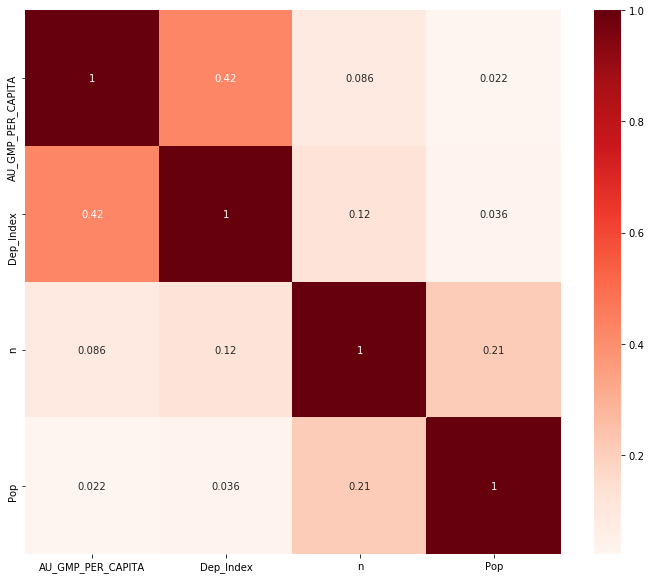

In [64]:
plt.figure(figsize=(12,10))
cor = dfNoStandard[['AU_GMP_PER_CAPITA','Dep_Index','n','Pop']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('/Users/keri/git/DotLovesData/visuals/correlationPlot.png')
plt.show()

In [63]:
dfNoStandardrdStandard.shape

(6897345, 9)

In [ ]:
dfNoStandard.drop_duplicates()

In [62]:
dfNoStandard.to_csv('/Users/keri/git/DotLovesData/data/formattedDf.csv',index=False)


In [61]:
df.to_csv('/Users/keri/git/DotLovesData/data/formattedDfWithColumns.csv',index=False)